## Initial Data Cleaning and Simple Visualizations
#### Hackathon 2, Notebook 1

We combine the NYC parking violations data (from our chosen 4 precincts and 4 days) with information about the ticket costs and type that correspond to each violation code. We also convert the data in the "Violation Time" column from a string to a datetime.time object. We used this cleaned and expanded dataset when we got geodata for each address.

In the latter portion of this notebook, we display preliminary bar graphs to visualize the parking violations data by time of day, date, and ticket cost.

In [56]:
#import libraries
import numpy as np
import pandas as pd
import folium as fm # For the map, will only work in Jupyter since it needs a browser
from folium.plugins import MarkerCluster # In order to add map clusters
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

### Reading in the Brooklyn Violations Data

In [57]:
# source: https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2019/pvqr-7yc4
df=pd.read_csv('brooklyn_violations.csv')

In [58]:
#Display Brooklyn Violations Data
df.head(10)

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State
0,8678224277,1/14/2019,14,83,83,1200P,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY"
1,8678223868,1/11/2019,21,90,90,1129A,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY"
2,8699568241,1/13/2019,50,79,79,0305P,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY"
3,8701817176,1/11/2019,50,90,90,0837A,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY"
4,8695487570,1/14/2019,50,90,90,1237P,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY"
5,8715522556,1/12/2019,50,81,81,0652A,S,Jefferson Ave,0ft E/of Howard Ave,"Brooklyn, NY"
6,8598239392,1/12/2019,50,79,79,0333P,N,Fulton St,0ft E/of Kingston Av,"Brooklyn, NY"
7,8582151032,1/12/2019,50,81,81,0842A,S,Pulaski St,0ft E/of Marcus Garv,"Brooklyn, NY"
8,8611202790,1/11/2019,50,90,90,0331P,S,Rutledge St,0ft E/of Marcy Ave,"Brooklyn, NY"
9,8689805205,1/14/2019,50,90,90,0239P,S,Harrison Ave,0ft E/of Middleton S,"Brooklyn, NY"


### Converting time to hr:min format

In [59]:
def str2time(s):
    try:
        hrs = int(s[0:2])
        mins = int(s[2:4])
        ampm = s[4]
        if ampm.upper() == 'P' and hrs != 12:
            hrs += 12
        return dt.time(hrs, mins)
    except:
        return np.nan

In [60]:
#Adding converted time to dataframe
df['Violation Time'] = df['Violation Time'].apply(str2time)

In [61]:
#Display dataframe to check new time format
df.head(10)

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State
0,8678224277,1/14/2019,14,83,83,12:00:00,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY"
1,8678223868,1/11/2019,21,90,90,11:29:00,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY"
2,8699568241,1/13/2019,50,79,79,15:05:00,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY"
3,8701817176,1/11/2019,50,90,90,08:37:00,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY"
4,8695487570,1/14/2019,50,90,90,12:37:00,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY"
5,8715522556,1/12/2019,50,81,81,06:52:00,S,Jefferson Ave,0ft E/of Howard Ave,"Brooklyn, NY"
6,8598239392,1/12/2019,50,79,79,15:33:00,N,Fulton St,0ft E/of Kingston Av,"Brooklyn, NY"
7,8582151032,1/12/2019,50,81,81,08:42:00,S,Pulaski St,0ft E/of Marcus Garv,"Brooklyn, NY"
8,8611202790,1/11/2019,50,90,90,15:31:00,S,Rutledge St,0ft E/of Marcy Ave,"Brooklyn, NY"
9,8689805205,1/14/2019,50,90,90,14:39:00,S,Harrison Ave,0ft E/of Middleton S,"Brooklyn, NY"


### Adding Ticket Cost and Ticket Type Columns to Dataframe
This involves loading in new data from https://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page, copy/pasted into an Excel file.

In [62]:
#Create the new columns
df['Ticket Cost'] = ''
df['Ticket Type'] = ''
df.head()

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State,Ticket Cost,Ticket Type
0,8678224277,1/14/2019,14,83,83,12:00:00,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY",,
1,8678223868,1/11/2019,21,90,90,11:29:00,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY",,
2,8699568241,1/13/2019,50,79,79,15:05:00,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY",,
3,8701817176,1/11/2019,50,90,90,08:37:00,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY",,
4,8695487570,1/14/2019,50,90,90,12:37:00,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY",,


In [63]:
# source: https://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page
# cleaned data in Excel / read in codes and their descriptions
violations = pd.read_excel('violation_codes.xlsx')

In [64]:
violations.set_index('CODE', inplace=True)

In [98]:
#This dataframe contains info on the violation types
violations.head(15)

,DEFINITION,Cost_Outside_Manhattan
CODE,,
4,Vehicles parked illegally south of Houston Str...,115
5,Failure to make a right turn from a bus lane.,115
7,Vehicles photographed going through a red ligh...,50
8,Vehicle idling in a restricted area.,115
9,Blocking an Intersection: Obstructing traffic ...,115
10,"Stopping, standing or parking where a sign, st...",115
11,Hotel Loading/Unloading: Standing or parking w...,115
13,Taxi Stand: Standing or parking where standing...,115
14,General No Standing: Standing or parking where...,115


In [66]:
def get_cost(code):
    import warnings
    warnings.filterwarnings('ignore')
    try:
        return int(violations.loc[int(code)]['Cost_Outside_Manhattan'])
    except:
        return np.nan

In [67]:
#Add ticket costs to dataframe
df['Ticket Cost'] = df['Violation Code'].apply(get_cost)

In [68]:
#Verify that the ticket costs were added properly
df.head()

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State,Ticket Cost,Ticket Type
0,8678224277,1/14/2019,14,83,83,12:00:00,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY",115.0,
1,8678223868,1/11/2019,21,90,90,11:29:00,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY",45.0,
2,8699568241,1/13/2019,50,79,79,15:05:00,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY",115.0,
3,8701817176,1/11/2019,50,90,90,08:37:00,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY",115.0,
4,8695487570,1/14/2019,50,90,90,12:37:00,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY",115.0,


In [69]:
#adding violation descriptions to dataframe
def get_type(code):
    import warnings
    warnings.filterwarnings('ignore')
    try:
        return violations.loc[int(code)]['DEFINITION']
    except:
        return np.nan

In [70]:
df['Ticket Type'] = df['Violation Code'].apply(get_type)

In [72]:
#Check that the descriptions were added properly
df.head()

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State,Ticket Cost,Ticket Type
0,8678224277,1/14/2019,14,83,83,12:00:00,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY",115.0,General No Standing: Standing or parking where...
1,8678223868,1/11/2019,21,90,90,11:29:00,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY",45.0,Street Cleaning: No parking where parking is n...
2,8699568241,1/13/2019,50,79,79,15:05:00,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ..."
3,8701817176,1/11/2019,50,90,90,08:37:00,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ..."
4,8695487570,1/14/2019,50,90,90,12:37:00,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ..."


### Basic Visualizations
1. Bar graph: # of violations by hour
2. Bar graph: # of violations by day
3. Bar graph: # of violations by ticket cost

Code for all three visualizations adapted from https://stevebottos.github.io/jupnotes/LA%20Parking%20Violations%202018

#### Number of Violations by Time of Day

In the visualization below, # of violations is highest around midday and tapers off in the late evening through early morning.

In [73]:
time_counts = df.groupby(by = 'Violation Time', as_index=False).agg({'Summons Number' : pd.Series.nunique})

In [74]:
def hour2int(t):
    if type(t) == dt.time:
        return int(t.hour)
    else:
        return np.nan

In [75]:
time_counts['Violation Time'] = df['Violation Time'].apply(hour2int)

<function matplotlib.pyplot.show(*args, **kw)>

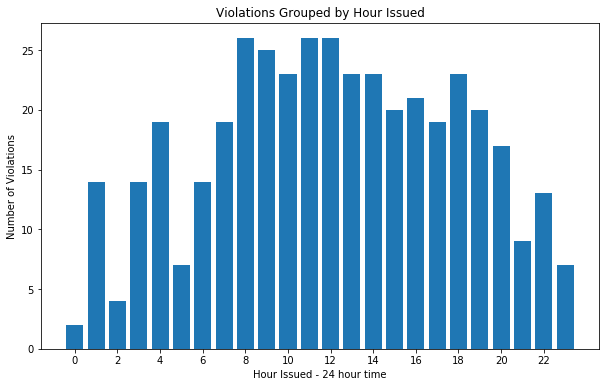

In [76]:
time_counts = time_counts.sort_values(by = ['Violation Time'], ascending = True)

f1 = plt.figure(figsize=(10, 6))
plt.bar(time_counts['Violation Time'], time_counts['Summons Number'], width=0.8)
plt.title('Violations Grouped by Hour Issued')
plt.xlabel('Hour Issued - 24 hour time')
plt.ylabel('Number of Violations')
plt.xticks(ticks=[0,2,4,6,8,10,12,14,16,18,20,22])
plt.show

#### Number of Violations by Date

In the visualization below, fewer violations are issued on the weekend days, especially Sunday (1/13), than on weekdays (Friday 1/11 and Monday 1/14).

In [77]:
day_counts = df.groupby(by = 'Issue Date', as_index=False).agg({'Summons Number' : pd.Series.nunique})
day_counts

,Issue Date,Summons Number
0,1/11/2019,1975
1,1/12/2019,943
2,1/13/2019,251
3,1/14/2019,2455


In [78]:
x = day_counts.iloc[1]['Issue Date']
type(x)

str

In [79]:
def str2int(d):
    day = int(d[2:4])
    return day
day_counts['Issue Date'] = day_counts['Issue Date'].apply(str2int)
day_counts.head()

,Issue Date,Summons Number
0,11,1975
1,12,943
2,13,251
3,14,2455


<function matplotlib.pyplot.show(*args, **kw)>

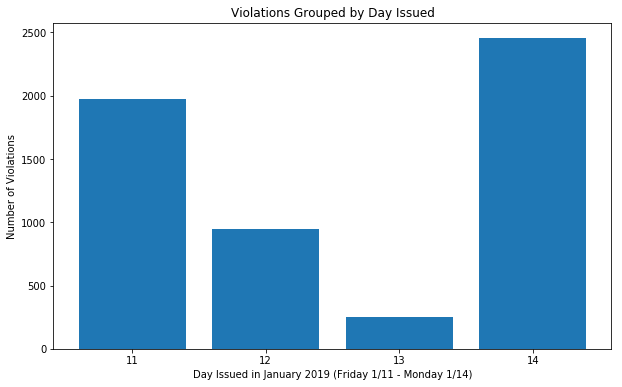

In [80]:
day_counts = day_counts.sort_values(by = ['Issue Date'], ascending = True)

f1 = plt.figure(figsize=(10, 6))
plt.bar(day_counts['Issue Date'], day_counts['Summons Number'], width=0.8)
plt.title('Violations Grouped by Day Issued')
plt.xlabel('Day Issued in January 2019 (Friday 1/11 - Monday 1/14)')
plt.ylabel('Number of Violations')
plt.xticks(ticks=[11,12,13,14])
plt.show

#### Number of Violations by Ticket Cost

The visualization below is the least informative (and 'pretty') of the three. In a dataset of over 5000 rows and 99 possible violation codes, there are only six unevenly-spaced ticket costs. In this dataset, 45-dollar tickets are the most common by far. The bar graph includes a great deal of white space because of a small number of 165-dollar tickets. 

<function matplotlib.pyplot.show(*args, **kw)>

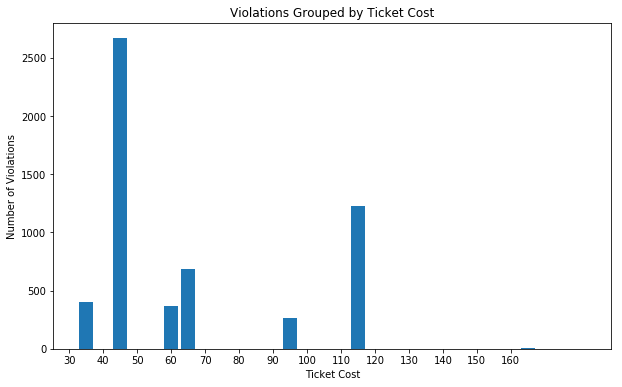

In [81]:
cost_counts = df.groupby(by = 'Ticket Cost', as_index=False).agg({'Summons Number' : pd.Series.nunique})
cost_counts = cost_counts.astype(float)
cost_counts = cost_counts.sort_values(by = ['Ticket Cost'], ascending = True)

f1 = plt.figure(figsize=(10, 6))
plt.bar(cost_counts['Ticket Cost'], cost_counts['Summons Number'], width=4.3, align='center')
plt.title('Violations Grouped by Ticket Cost')
plt.xlabel('Ticket Cost')
plt.ylabel('Number of Violations')
plt.xticks(np.arange(30, 165, 10))
plt.show

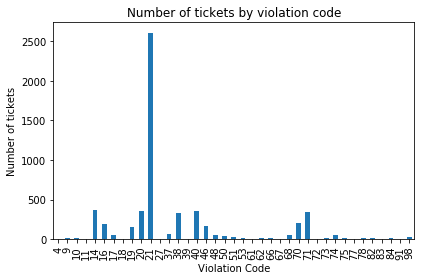

In [96]:
# number of violations of each type
bycode = df.sort_values('Violation Code').groupby('Violation Code')
bycode.size().plot('bar')
plt.ylabel('Number of tickets')
plt.title('Number of tickets by violation code')
plt.tight_layout()

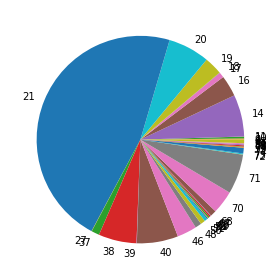

In [97]:
#pie chart of most common violations
(bycode.size() / len(df)).plot('pie')
plt.ylabel('')
plt.tight_layout()

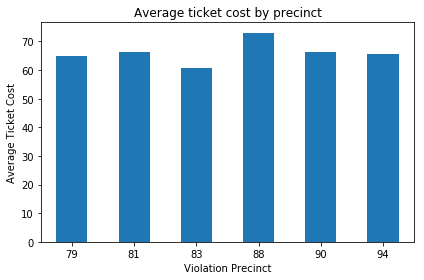

In [103]:
#Averagae ticket cost by precinct
df['Ticket Cost'] = df['Ticket Cost'].apply(lambda x: float(x))
df.groupby('Violation Precinct').mean()['Ticket Cost'].plot('bar', rot=0)
plt.ylabel('Average Ticket Cost')
plt.title('Average ticket cost by precinct')
plt.tight_layout()

# Clustered Map

In [82]:
# load in data taken from the combinded dataframes above
df = pd.read_csv('violations_final.csv', index_col='Unnamed: 0', 
                 parse_dates=['Issue Datetime'], dtype={'Ticket Cost' : str})

df.dropna(subset=['Zip Code', 'Ticket Cost'], inplace=True)

df['Zip Code'] = df['Zip Code'].astype(np.int64)


In [83]:
# how many datapoints do we have?
len(df)

5582

In [84]:
# check data formatting 
df.head()

,Issue Datetime,Summons Number,Violation Code,Violation Location,Violation Precinct,House Number,Street Name,Intersecting Street,City & State,Ticket Cost,Ticket Type,Zip Code,Lat,Long
0,2019-01-14 12:00:00,8678224277,14,83,83,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY",115.0,General No Standing: Standing or parking where...,11237,40.708059,-73.922539
1,2019-01-11 11:29:00,8678223868,21,90,90,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY",45.0,Street Cleaning: No parking where parking is n...,11249,40.700221,-73.959873
2,2019-01-13 15:05:00,8699568241,50,79,79,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ...",11216,40.680918,-73.951157
3,2019-01-11 08:37:00,8701817176,50,90,90,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ...",11211,40.713345,-73.960163
4,2019-01-14 12:37:00,8695487570,50,90,90,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ...",11206,40.701637,-73.942267


In [85]:
# map between folium color options and ticket costs
v_types = pd.unique(df['Ticket Cost'])
colors = ['red', 'blue', 'green', 'purple', 'orange', 'beige', 'white', 'pink']

cdict = {v : c for v, c in zip(v_types, colors)}

In [88]:
# This is the legend for the colored points on the clustered map. 
cdict

{'115.0': 'red',
 '45.0': 'blue',
 '65.0': 'green',
 '95.0': 'purple',
 '35.0': 'orange',
 '60.0': 'beige',
 '165.0': 'white',
 '180.0': 'pink'}

In [102]:
# This is the key for the violation codes and their descriptons on the clustered map

for code , desc in violations['DEFINITION'].to_dict().items():
    if code == 21:
        # bold most common violation type
        print(f'\033[1m{str(code)}:\n{desc}\033[0m')
    else:
        print(f'{str(code)}:\n{desc}')
    print('_'*40)


4:
Vehicles parked illegally south of Houston Street in Manhattan in metered spaces reserved for buses from 7am - 7pm daily. 
________________________________________
5:
Failure to make a right turn from a bus lane.
________________________________________
7:
Vehicles photographed going through a red light at an intersection
________________________________________
8:
Vehicle idling in a restricted area.
________________________________________
9:
Blocking an Intersection: Obstructing traffic at an intersection also known as "Blocking the Box".
________________________________________
10:
Stopping, standing or parking where a sign, street marking, or traffic control device does not allow stopping.
________________________________________
11:
Hotel Loading/Unloading: Standing or parking where standing is not allowed by sign, street marking or; traffic control device.
________________________________________
13:
Taxi Stand: Standing or parking where standing is not allowed by sign, stree

In [101]:
# create map instance @ correct location
m = fm.Map([40.7255, -73.9465], zoom_start=14)

# create lists of violation times, format them into popup icons
vtimes = df['Issue Datetime'].apply(lambda x: x.strftime('%m/%d/%y')).tolist()
vcodes = df['Violation Code'].astype(str).tolist()
popups = ['\nViolation Code: '.join([t, c]) for t, c in zip(vtimes, vcodes)]
icons = [fm.Icon(color=cdict[tcost]) for tcost in df['Ticket Cost']]

# create MarkerCluster object with location and info of each violation
marker_cluster = MarkerCluster(locations=list(zip(df['Lat'], df['Long'])), 
                               popups=popups, 
                               icons=icons).add_to(m)

In [87]:
# folium/Jupyter can't handle a map with this much data, so save it out as an HTML file that can be opened later
m.save(outfile='all_days_clustered.html')

## Choropleth Map

In [115]:
#read in required .csv file and make sure data types are CORRECT!
df = pd.read_csv('violations_final.csv', index_col='Unnamed: 0', 
                 parse_dates=['Issue Datetime'], dtype={'Ticket Cost' : str})

df.dropna(subset=['Zip Code'], inplace=True)

df['Zip Code'] = df['Zip Code'].astype(np.int64)

In [106]:
#Read in our total counts spreadsheet
df1 = pd.read_csv('totalcounts.csv')

In [107]:
#Removed "TH" from precinct info
df1.Precinct = df1.Precinct.apply(lambda x: x[:2])

In [116]:
#check dataframe
df1

,Precinct,Violations
0,79,1105
1,81,510
2,83,1092
3,88,525
4,90,1378
5,94,1014


In [113]:
#starts the map in Grenpoint, BK @ the right zoom level
m = fm.Map(location=[40.7305, -73.9515], zoom_start=14)


#Binds our pandas dataframe above the the geojson file taken from NYCOPENDATA (https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz)

nygeojson = 'PP.geojson'
Count = df1

chor = fm.features.Choropleth(geo_data=nygeojson, data=Count, name='choropleth', columns=['Precinct', 'Violations'],
                              key_on='feature.properties.precinct', fill_color='YlGn', nan_fill_color='None', 
                              highlight=True, fill_opacity=0.8, line_opacity=1, bins=8, smooth_factor=0,
                              legend_name='TOTAL VIOLATIONS').add_to(m)

In [114]:
#Saves file to an HTML since it can't generate in browser
m.save(outfile='choropleth.html')